# 2020-01-22 Phosphate Sensor Calibration

In [218]:
library(tidyverse)
library(readxl)
library(lubridate)

# set theme for plotting

# Set font sizes
SMALL_SIZE = 10
MEDIUM_SIZE = 11
BIG_SIZE = 12

# SMALL_SIZE = 6
# MEDIUM_SIZE = 7
# BIG_SIZE = 8

theme_custom <- theme_bw() +
  theme(
    text = element_text(family = "Helvetica", size = BIG_SIZE),
    axis.title = element_text(size = BIG_SIZE),
    axis.text = element_text(size = BIG_SIZE),
    axis.ticks = element_line(size = 0.05),
    axis.ticks.length = unit(0.05, 'cm'),
#     legend.position = 'right',
#     legend.spacing.y = unit(0.01, 'cm'),
#     legend.box = 'horizontal',
#     legend.box.just = 'left',
#     legend.text = element_text(size = SMALL_SIZE),
#     legend.title = element_text(size = SMALL_SIZE),
#     legend.margin = margin(t = 0, unit='cm'),
    axis.line = element_line(size = 0.1),
    strip.text.x = element_text(size = SMALL_SIZE)
  )

# options(repr.plot.width=20, repr.plot.height=5)

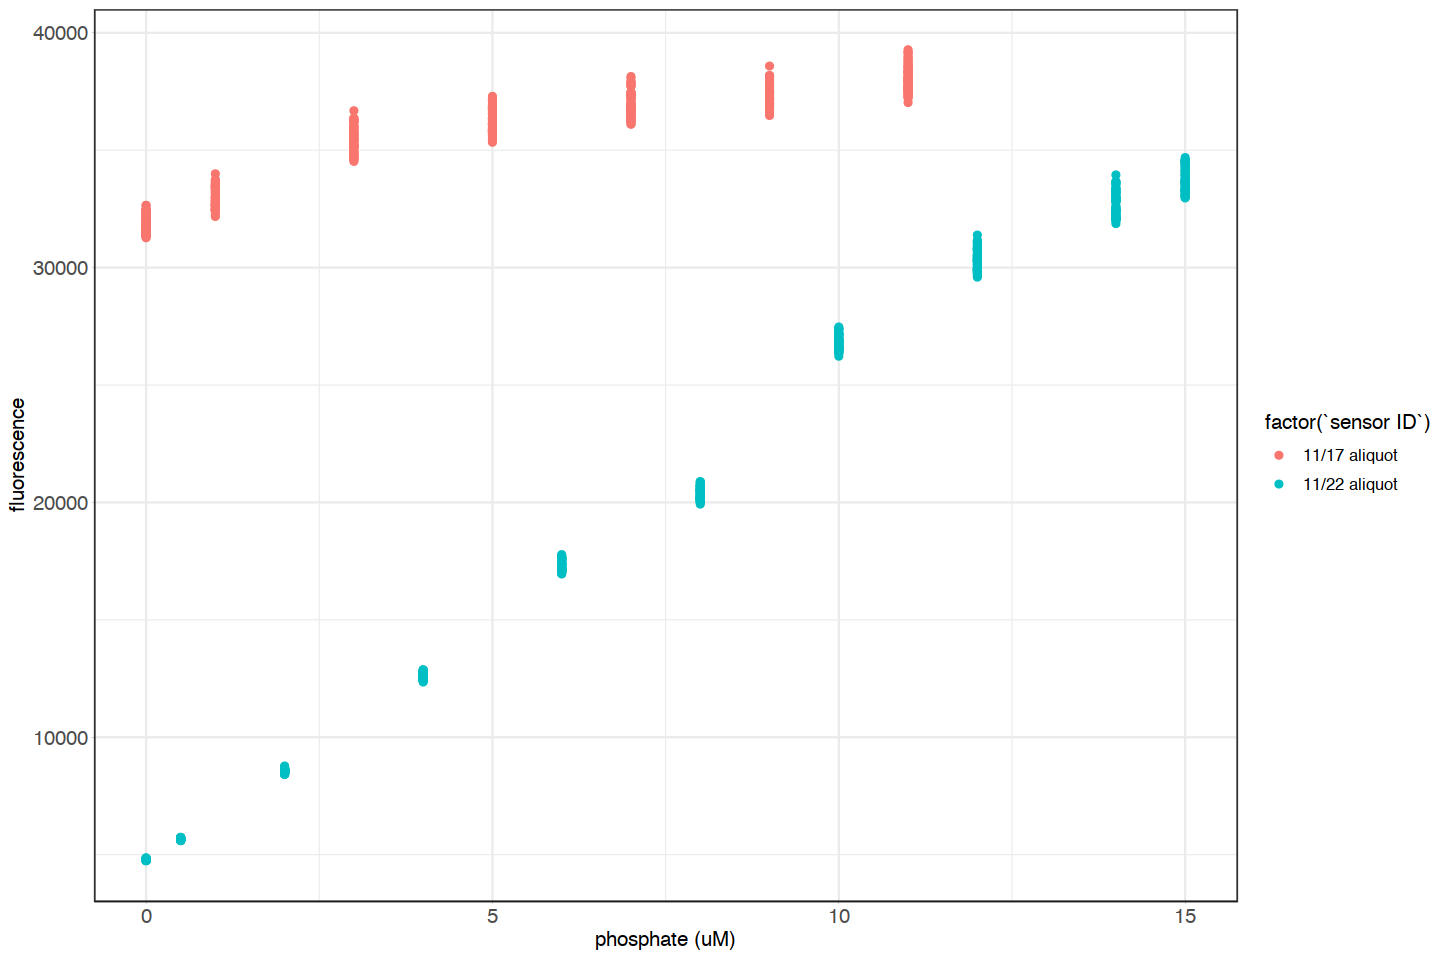

In [219]:
plate_setup <- read_excel('./20210121_sensor_calib.xlsx')

d_calib <-
    read_delim('../../data/GAP_assay/20210121_Phosphate_Calibration.txt',
               delim='\t', col_types=cols(), skip=46, n_max = 67,
               locale = readr::locale(encoding = "windows-1252")) %>% 
    mutate(timepoint = row_number()) %>% 
    pivot_longer(cols = `A1`:`B6`, names_to = 'well', values_to = 'fluorescence') %>% 
    left_join(plate_setup %>% select(well, `sensor ID`, `final conc P (uM)`), by='well') %>% 
    select('time' = Time, timepoint, well, fluorescence, `sensor ID`, 'phosphate (uM)' = `final conc P (uM)`) %>% 
    mutate(`sensor ID` = case_when(`sensor ID` == 1 ~ '11/17 aliquot', `sensor ID` == 2 ~ '11/22 aliquot'))

options(repr.plot.width=12, repr.plot.height=8)

d_calib %>% 
#     filter(timepoint %in% c(1,67)) %>% 
    ggplot(aes(x=`phosphate (uM)`, y=fluorescence, color=factor(`sensor ID`))) + 
    geom_point() + 
#     facet_grid(cols = vars(timepoint)) +
    theme_custom

- we need to figure out which one is wrong...

### I need to read in the data from the other GAP assays and see what the observed range of values is

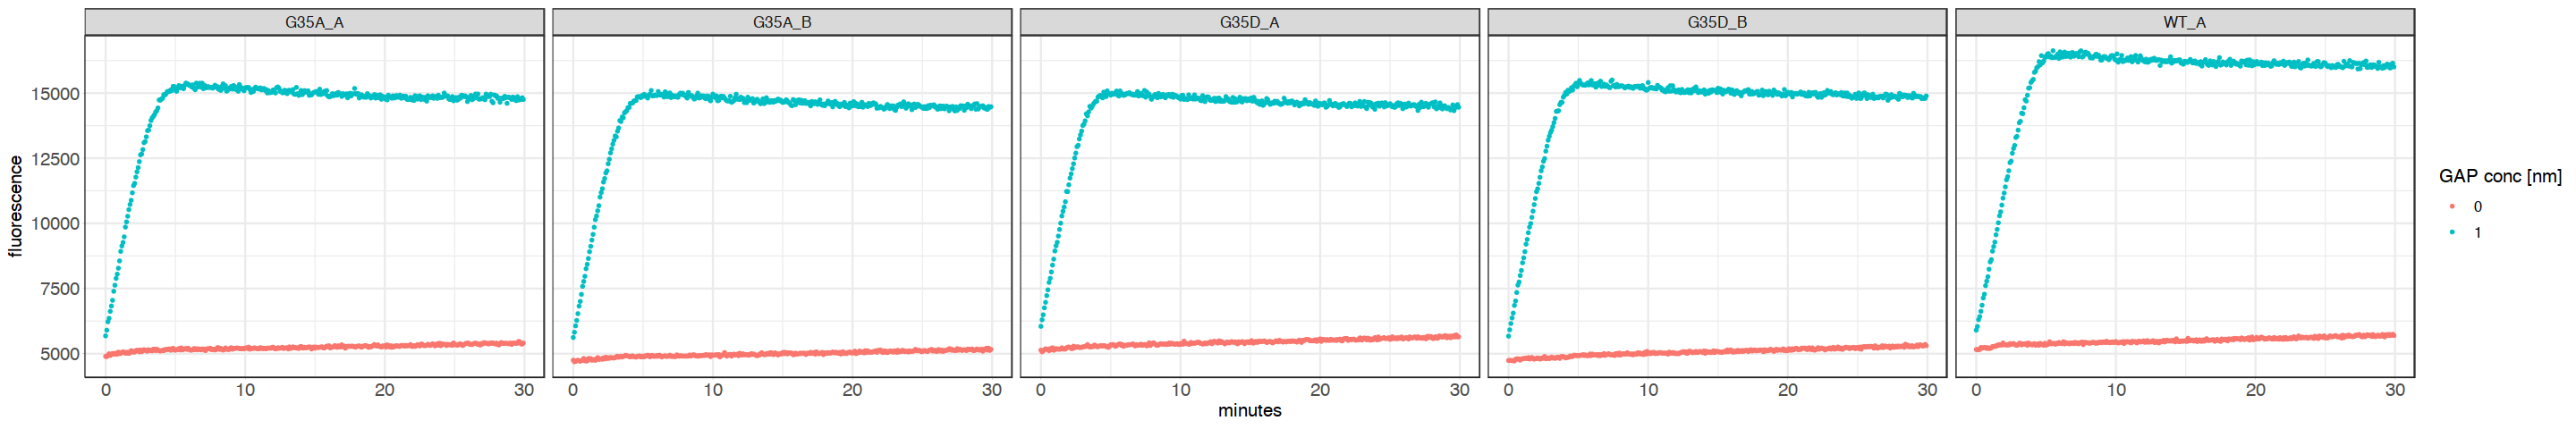

In [220]:
# 20210117 DATA

# Remove the WT samples in wells C3 and C4 because the rxn vol was incorrect (see notebook entry)

plate_setup <-
    read_delim('./20210117/index_table_temp_CORRECTED.txt', delim='\t', col_types=cols()) %>% 
    mutate(`sensor ID` = c('A','A','A','A','A','A','B','B','B','B','B','B'),
           'loading' = c('A','A','B','B','A','A','A','A','B','B','B','B')) %>% 
    filter(! well %in% c('C3', 'C4')) %>% 
    select('mutant' = prot, well, `sensor ID`, loading, 'gsp1_conc' = fin.Ran.conc)
    
d_20210117 <-
    read_delim('../../data/GAP_assay/20210117_GAP_assay.txt',
               delim='\t', col_types=cols(), skip=46, n_max = 721,
               locale = readr::locale(encoding = "windows-1252")) %>% 
    mutate(timepoint = row_number()) %>%
    pivot_longer(cols = `C1`:`C12`, names_to = 'well', values_to = 'fluorescence') %>% 
    separate('well', c('row', 'col'), sep=1, remove=FALSE, convert=TRUE) %>% 
    inner_join(plate_setup, by='well') %>% 
    mutate(`GAP conc [nm]` = factor(ifelse(col %% 2 == 0, 0, 1))) %>% 
    select('time' = Time, timepoint, mutant, loading, well, row, col, fluorescence, `sensor ID`, gsp1_conc, `GAP conc [nm]`)

options(repr.plot.width=24, repr.plot.height=4)

d_20210117 %>% 
    mutate('label' = paste(mutant, loading, sep='_')) %>% 
    mutate(minutes = period_to_seconds(hms(time))/60) %>% 
    filter(minutes < 30) %>% 
    ggplot(aes(x=minutes, y=fluorescence, color=`GAP conc [nm]`)) + 
    geom_point(size=0.5) +
    facet_grid(col=vars(label)) +
    theme_custom

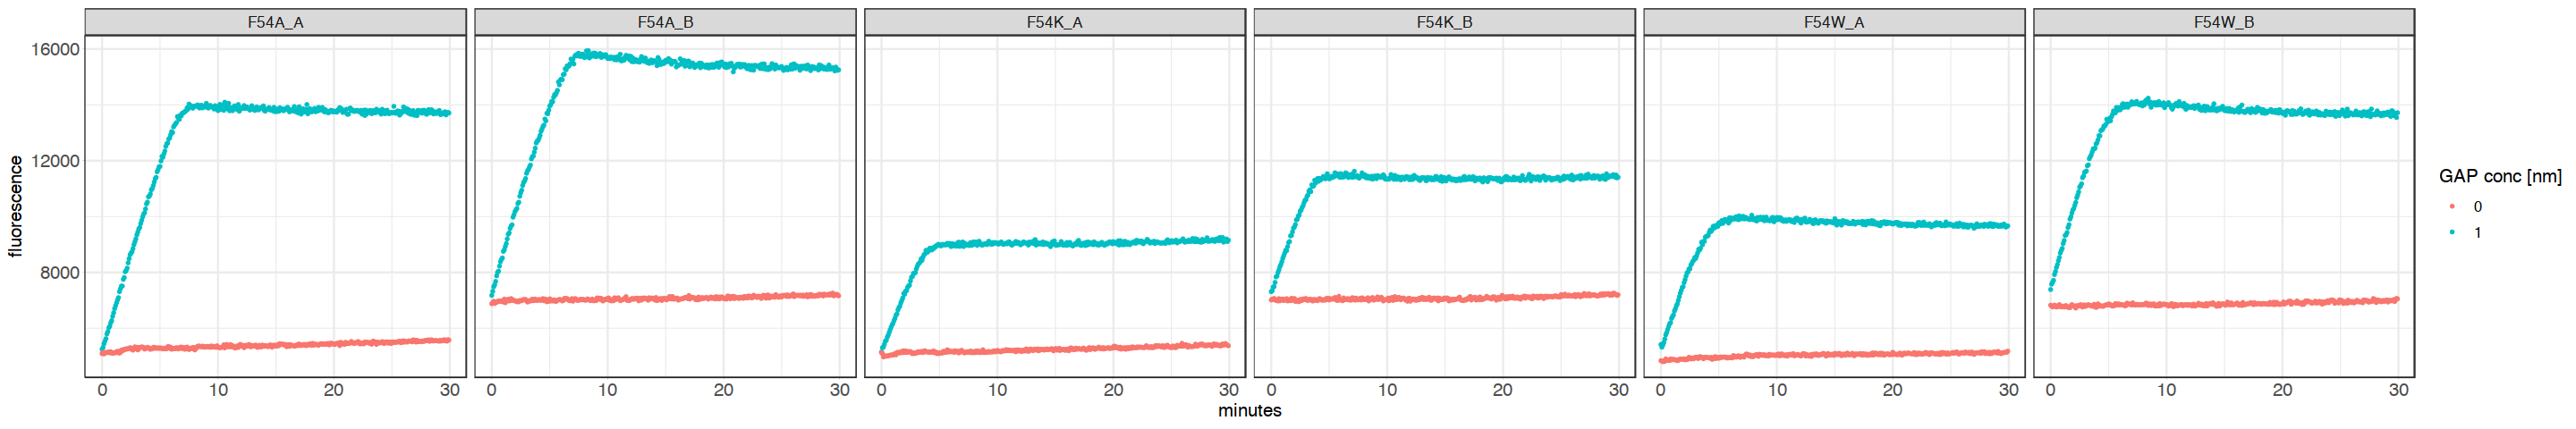

In [221]:
# 20210118 DATA


plate_setup <-
    read_delim('./20210118/index_table_temp.txt', delim='\t', col_types=cols()) %>% 
    mutate(`sensor ID` = c('A','A','A','A','A','A','B','B','B','B','B','B'),
           'loading' = c('A','A','A','A','A','A','B','B','B','B','B','B')) %>% 
    select('mutant' = prot, well, `sensor ID`, loading, 'gsp1_conc' = fin.Ran.conc)
    
d_20210118 <-
    read_delim('../../data/GAP_assay/20210118_GAP_assay.txt',
               delim='\t', col_types=cols(), skip=46, n_max = 721,
               locale = readr::locale(encoding = "windows-1252")) %>% 
    mutate(timepoint = row_number()) %>%
    pivot_longer(cols = `E1`:`E12`, names_to = 'well', values_to = 'fluorescence') %>% 
    separate('well', c('row', 'col'), sep=1, remove=FALSE, convert=TRUE) %>% 
    inner_join(plate_setup, by='well') %>% 
    mutate(`GAP conc [nm]` = factor(ifelse(col %% 2 == 0, 0, 1))) %>% 
    select('time' = Time, timepoint, mutant, loading, well, row, col, fluorescence, `sensor ID`, gsp1_conc, `GAP conc [nm]`)

options(repr.plot.width=24, repr.plot.height=4)

d_20210118 %>% 
    mutate('label' = paste(mutant, loading, sep='_')) %>% 
    mutate(minutes = period_to_seconds(hms(time))/60) %>% 
    filter(minutes < 30) %>% 
    ggplot(aes(x=minutes, y=fluorescence, color=`GAP conc [nm]`)) + 
    geom_point(size=0.5) +
    facet_grid(col=vars(label)) +
    theme_custom

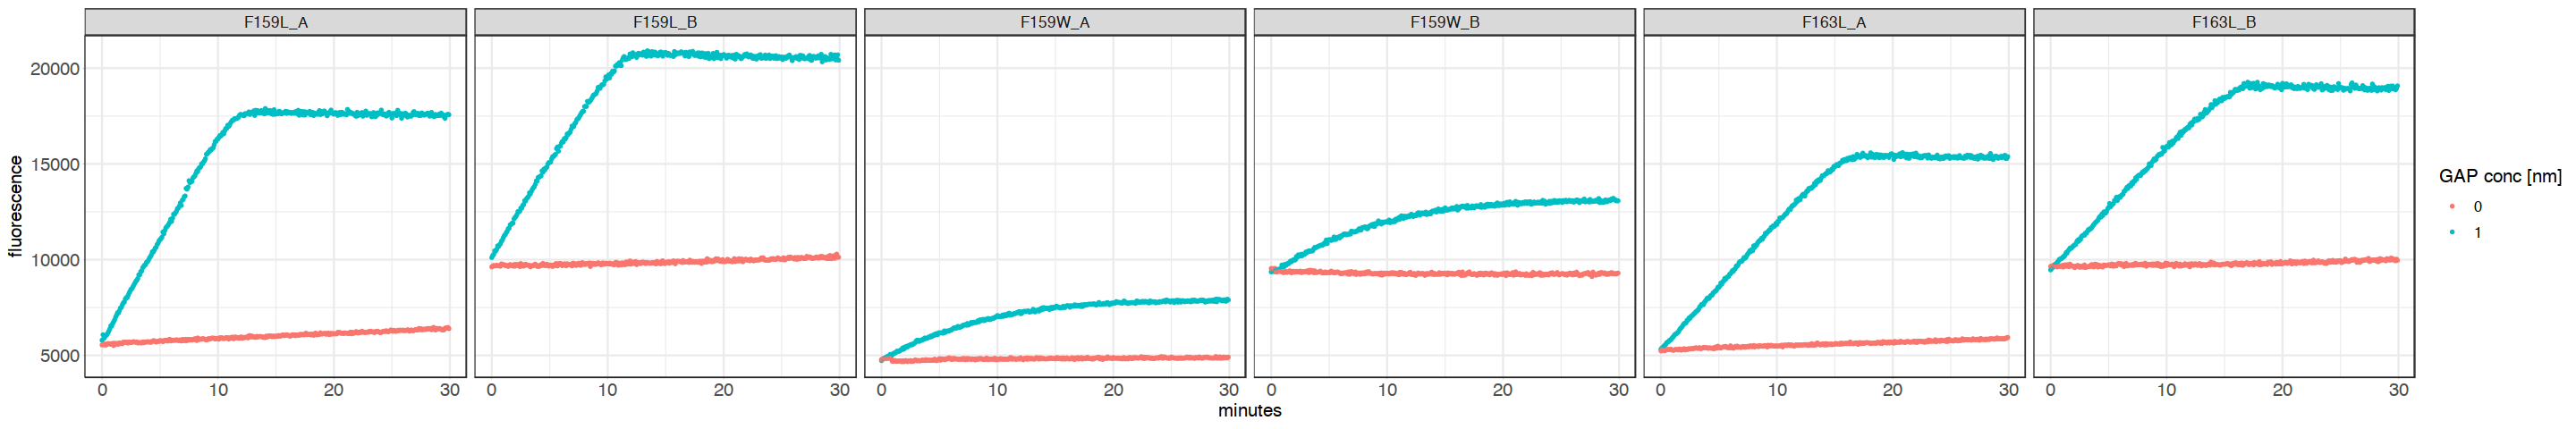

In [222]:
# 20210119 DATA


plate_setup <-
    read_delim('./20210119/index_table_temp.txt', delim='\t', col_types=cols()) %>% 
    mutate(`sensor ID` = c('A','A','A','A','A','A','B','B','B','B','B','B'),
           'loading' = c('A','A','A','A','A','A','B','B','B','B','B','B')) %>% 
    select('mutant' = prot, well, `sensor ID`, loading, 'gsp1_conc' = fin.Ran.conc)
    
d_20210119 <-
    read_delim('../../data/GAP_assay/20210119_GAP_assay.txt',
               delim='\t', col_types=cols(), skip=46, n_max = 721,
               locale = readr::locale(encoding = "windows-1252")) %>% 
    mutate(timepoint = row_number()) %>%
    pivot_longer(cols = `G1`:`G12`, names_to = 'well', values_to = 'fluorescence') %>% 
    separate('well', c('row', 'col'), sep=1, remove=FALSE, convert=TRUE) %>% 
    inner_join(plate_setup, by='well') %>% 
    mutate(`GAP conc [nm]` = factor(ifelse(col %% 2 == 0, 0, 1))) %>% 
    select('time' = Time, timepoint, mutant, loading, well, row, col, fluorescence, `sensor ID`, gsp1_conc, `GAP conc [nm]`)

options(repr.plot.width=24, repr.plot.height=4)

d_20210119 %>% 
    mutate('label' = paste(mutant, loading, sep='_')) %>% 
    mutate(minutes = period_to_seconds(hms(time))/60) %>% 
    filter(minutes < 30) %>% 
    ggplot(aes(x=minutes, y=fluorescence, color=`GAP conc [nm]`)) + 
    geom_point(size=0.5) +
    facet_grid(col=vars(label)) +
    theme_custom

After discussing with Tina, it looks like I messed up something with the 11/17 sensor, but the 11/22 sensor looks good, so we will fit a curve to that

Tina's method from the paper was:
- ignore phoshpate concentrations above 60% of the sensor (so up to 12 uM phopshate for 20 uM sensor)
- compute the mean value of all timepoints of the 0 phosphate well (call this the blank)
- subtract the blank value from all other measurements, effectively zeroing the minimum
- fit a line through all of the points

In [253]:
d_calib2 <-
    d_calib %>% 
    filter(`sensor ID` == '11/22 aliquot', `phosphate (uM)` < 13) %>% 
    select(well, `phosphate (uM)`, fluorescence) %>% 
    group_by(well) %>% 
    mutate('mean_fluorescence' = mean(fluorescence)) %>% 
    ungroup() %>% 
    mutate('blank_mean_fluorescence' = min(mean_fluorescence),
           'zeroed_fluorescence' = fluorescence-blank_mean_fluorescence)


library(broom)
calibration <- tidy(lm(`phosphate (uM)` ~ zeroed_fluorescence, d_calib2))
calibration

intercept <- calibration$estimate[1]
slope <- calibration$estimate[2]

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.2113335605,1.978683e-02,10.68052,2.892773e-24
zeroed_fluorescence,0.0004629023,1.392792e-06,332.35557,0.000000e+00


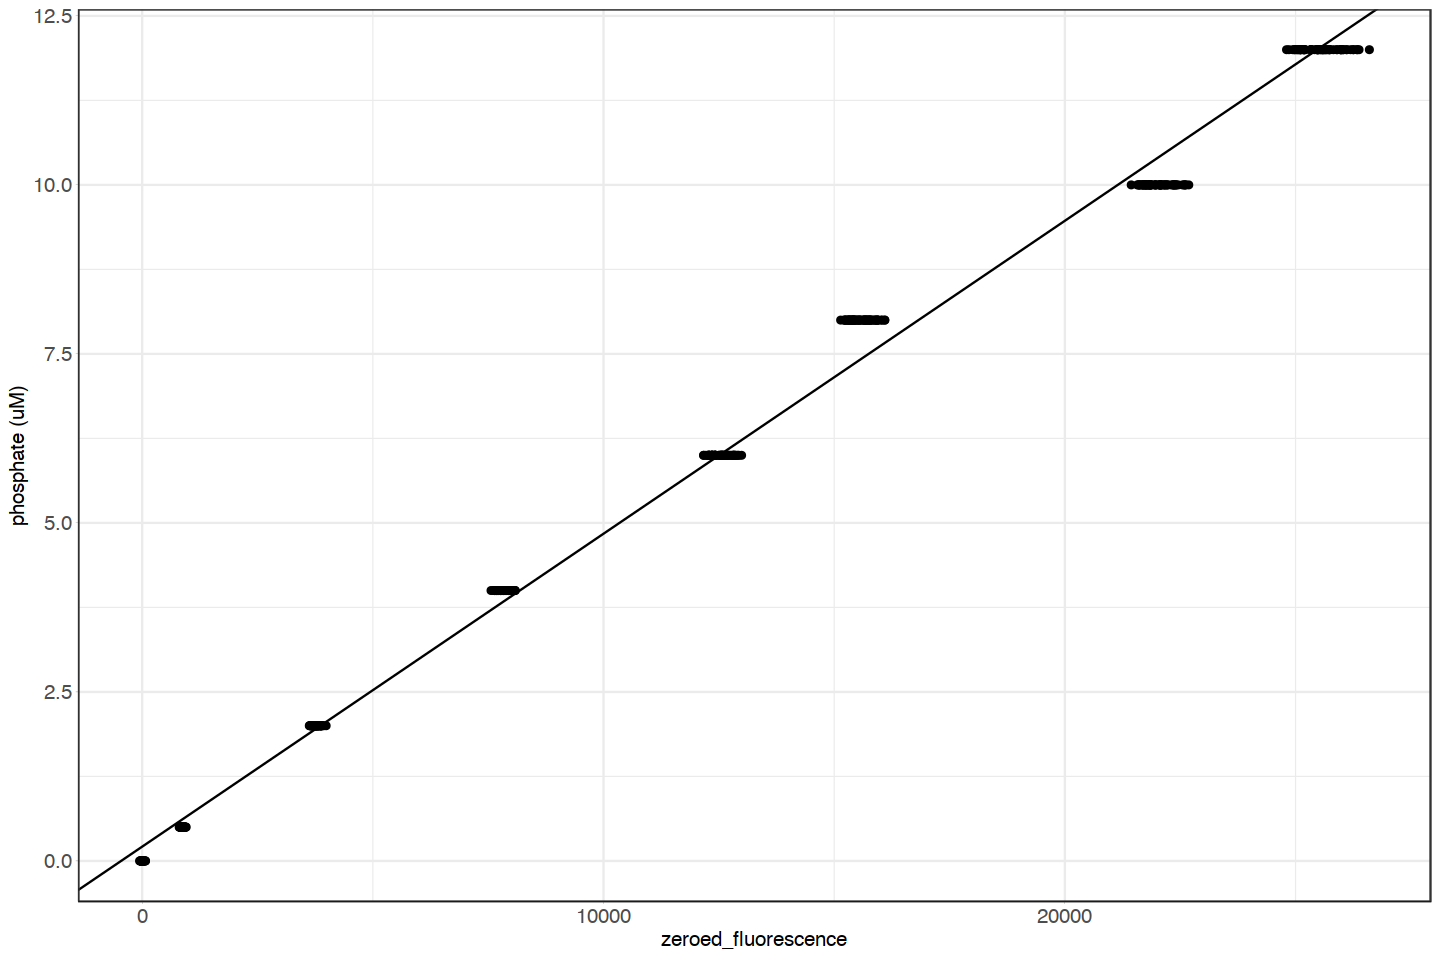

In [254]:
options(repr.plot.width=12, repr.plot.height=8)

ggplot(d_calib2, aes(x=zeroed_fluorescence, y=`phosphate (uM)`)) + 
    geom_point() +
    geom_abline(aes(slope=slope,intercept=intercept)) +

    theme_custom